# Communicable Diseases
Jupyter notebook written by Lisa Weiss
in context of the Hackathon of the Udacity Data Science Scholarship Powered by Bertelsmann.
Data taken from:http://apps.who.int/gho/data/node.main.A1357STI?lang=en for communicable diseases: (here syphilis, data sets used: tested, positively tested and treated women) 
Data for internet penetration: https://ourworldindata.org/internet (share of individuals using internet)

## Read, clean and explore disease data

In [1]:
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

def fit_func(x,a,b):
    return a*np.exp(-x*b)

def fit_func2(x,a,b):
    return 100-a*np.exp(-x*b)


%matplotlib inline
raw_tested=pd.read_csv('tested-syphilis.csv')
old_columns_tested=raw_tested.columns
raw_tested.columns=['country', 'year', 'tested']
raw_positiv=pd.read_csv('positiv-syphilis.csv')
old_columns_positiv=raw_positiv.columns
raw_positiv.columns=['country', 'year', 'positiv']
raw_treated=pd.read_csv('treated-syphilis.csv')
old_columns_treated=raw_treated.columns
raw_treated.columns=['country','year', 'treated']
old_columns_tested

Index(['Country', 'Year',
       'Women accessing antenatal care (ANC) services who were tested for syphilis (%)'],
      dtype='object')

In [2]:
old_columns_positiv

Index(['Country', 'Year',
       'Antenatal care attendees who were positive for syphilis (%)'],
      dtype='object')

In [3]:
old_columns_treated

Index(['Country', 'Year',
       'Antenatal care attendees positive for syphilis who received treatment (%)'],
      dtype='object')

In [7]:
raw_positiv.head(n=5)

,country,year,positiv
0,Afghanistan,2016,0.30
1,Afghanistan,2015,0.60
2,Algeria,2014,0.20
3,Algeria,2011,1.85
4,Algeria,2008,0.80


#### Clean data
eliminate NaN, remove preceding and succeeding spaces in the country table. This is important, since data will be joined on the 'country' and 'year' column

In [17]:
raw_treated=raw_treated.dropna(axis=0)
raw_positiv=raw_positiv.dropna(axis=0)
raw_tested=raw_tested.dropna(axis=0)
raw_treated['country']=raw_treated['country'].str.strip().str.title()
raw_positiv['country']=raw_positiv['country'].str.strip().str.title()
raw_tested['country']=raw_tested['country'].str.strip().str.title()
raw_treated.head(n=5)

,country,year,treated
0,Afghanistan,2016.0,100.0
1,Afghanistan,2015.0,100.0
2,Algeria,2014.0,100.0
3,Antigua And Barbuda,2016.0,100.0
4,Antigua And Barbuda,2015.0,100.0


## Read, manipulate and explore internet data

In [18]:
raw_inet=pd.read_csv('share-of-individuals-using-the-internet.csv')
raw_inet.head(n=10)

,Entity,Code,Year,Individuals using the Internet (% of population) (% of population)
0,Afghanistan,AFG,1990,0.000000
1,Afghanistan,AFG,2001,0.004723
2,Afghanistan,AFG,2002,0.004561
3,Afghanistan,AFG,2003,0.087891
4,Afghanistan,AFG,2004,0.105809
5,Afghanistan,AFG,2005,1.224148
6,Afghanistan,AFG,2006,2.107124
7,Afghanistan,AFG,2007,1.900000
8,Afghanistan,AFG,2008,1.840000
9,Afghanistan,AFG,2009,3.550000


In [19]:
columns=raw_inet.columns
columns

Index(['Entity', 'Code', 'Year',
       'Individuals using the Internet (% of population) (% of population)'],
      dtype='object')

In [20]:
raw_inet.shape

(5721, 4)

In [21]:
inet=raw_inet.drop('Code', axis=1)
inet.shape

(5721, 3)

In [22]:
inet.columns=['country', 'year', 'internet']

In [23]:
inet['year'].dtype

dtype('int64')

In [24]:
inet['country']=inet['country'].str.strip().str.title()
inet.head(n=5)

,country,year,internet
0,Afghanistan,1990,0.000000
1,Afghanistan,2001,0.004723
2,Afghanistan,2002,0.004561
3,Afghanistan,2003,0.087891
4,Afghanistan,2004,0.105809


## Merge Internet and Disease data on 'country' and 'year' column

In [25]:
merged_inner = pd.merge(left=inet,right=raw_tested, left_on=['country', 'year'], right_on=['country','year'])

In [26]:
merged_inner2 = pd.merge(left=merged_inner, right=raw_positiv, left_on=['country', 'year'], right_on=['country', 'year'])
data=pd.merge(left=merged_inner2,right=raw_treated, left_on=['country', 'year'], right_on=['country', 'year'] )
data.head(n=10)

,country,year,internet,tested,positiv,treated
0,Afghanistan,2015,8.260000,83.6,0.6,100.0
1,Algeria,2014,25.000000,64.1,0.2,100.0
2,Antigua And Barbuda,2012,58.000000,71.0,0.2,100.0
3,Antigua And Barbuda,2014,64.000000,100.0,0.3,100.0
4,Antigua And Barbuda,2015,65.200000,100.0,1.1,100.0
5,Argentina,2010,45.000000,90.8,1.1,74.1
6,Argentina,2011,51.000000,90.9,1.1,74.1
7,Argentina,2015,69.400921,77.6,1.4,82.2
8,Bahamas,2010,43.000000,100.0,1.1,100.0
9,Bahamas,2012,71.748203,91.6,0.6,100.0


Transform perecentages of positive tests of all women tested to percentages of the total femal population. Same for the women that recevied treatment. 

In [29]:
data['year']=pd.to_numeric(data['year'])
data['tested']=pd.to_numeric(data['tested'])
data['positiv']=data['tested']/100*data['positiv']
data['treated']=data['treated']/100*data['treated']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7e1de2d278>]],
      dtype=object)

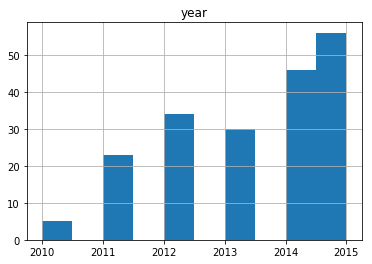

In [30]:
data.hist('year')

In [31]:
help_array = data.loc[data['year'] == 2015]
data_2015=help_array.drop('year', axis=1)
data_2015['tested'].dtype

dtype('float64')

Fit an exponential function to the data of all countries, all years

In [32]:
sorted_data=data.sort_values('internet')
xdata=sorted_data['internet'].values
ydata=sorted_data['positiv'].values

popt, pcov = curve_fit(fit_func, xdata, ydata)

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in exp
  


/home/lisa/.local/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


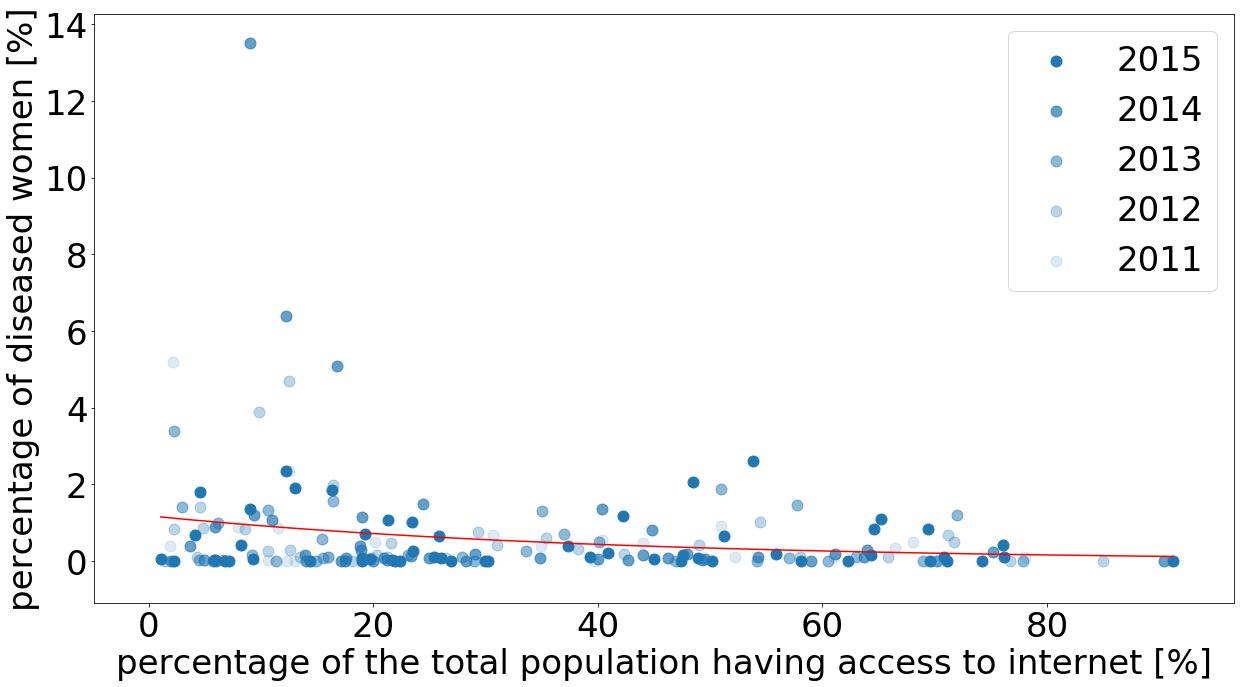

In [33]:
help_array = data.loc[data['year'] == 2014]
data_2014=help_array.drop('year', axis=1)
help_array = data.loc[data['year'] == 2013]
data_2013=help_array.drop('year', axis=1)
help_array = data.loc[data['year'] == 2012]
data_2012=help_array.drop('year', axis=1)
help_array = data.loc[data['year'] == 2011]
data_2011=help_array.drop('year', axis=1)


font = {'family' : 'normal',
         'weight' : 'normal',
        'size'   : 34}

plt.rc('font', **font)
ax1=data_2015.plot.scatter(x='internet',y='positiv',alpha=1,s=120,label='2015')

ax2=data_2014.plot.scatter(ax=ax1,x='internet',y='positiv',alpha=0.7,s=120,label='2014')
ax3=data_2013.plot.scatter(ax=ax2,x='internet',y='positiv',alpha=0.5,s=120,label='2013')
ax4=data_2012.plot.scatter(ax=ax3,x='internet',y='positiv',alpha=0.3,s=120,label='2012')
ax5=data_2011.plot.scatter(ax=ax4,x='internet',y='positiv',alpha=0.15,s=120,label='2011')
ax6=plt.plot(xdata, fit_func(xdata, *popt),color='red',label='fit')
plt.xlabel("percentage of the total population having access to internet [%]")
plt.ylabel("percentage of diseased women [%]")
fig =plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.gca().yaxis.set_major_formatter(ticker.FormatStrFormatter("%.0f"))


plt.savefig('positive-syphilis-women.png',format='png',transparent=False,dpi=80)
plt.tight_layout()

#### same procedure as previously to plot data for the percentage of tested women

In [34]:
xdata=sorted_data['internet'].values
ydata=sorted_data['tested'].values

popt, pcov = curve_fit(fit_func2, xdata, ydata)

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in exp
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in multiply
  # This is added back by InteractiveShellApp.init_path()


/home/lisa/.local/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


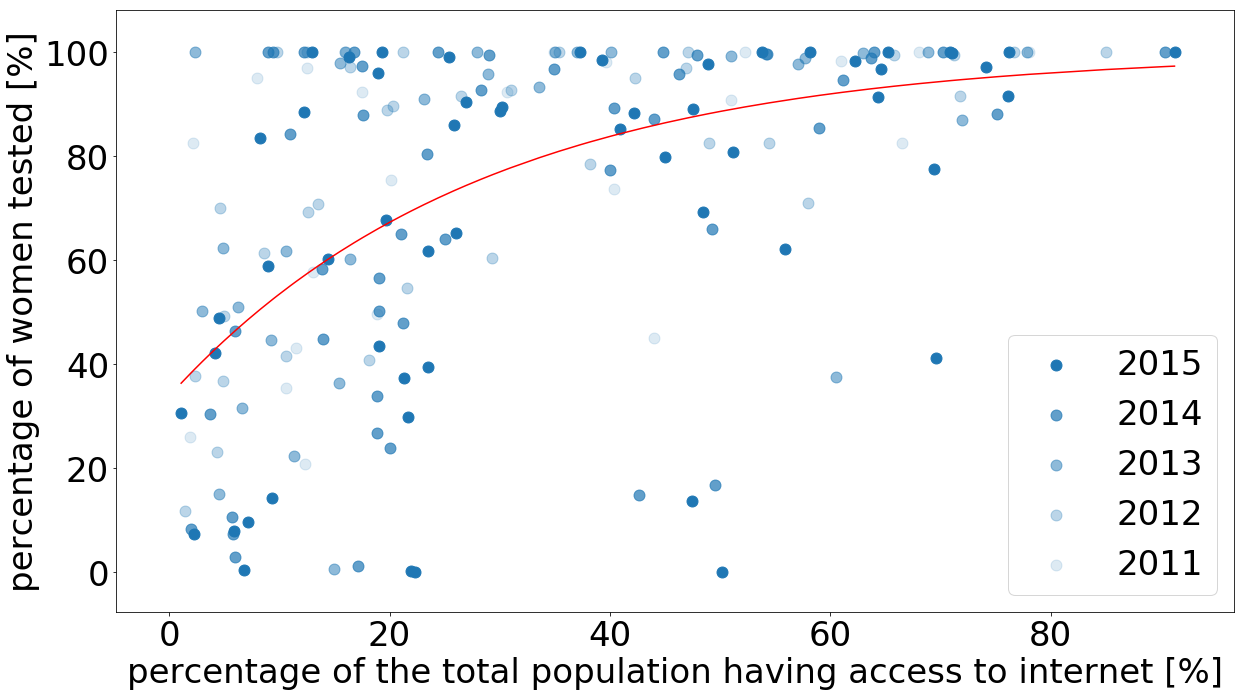

In [35]:
font = {'family' : 'normal',
         'weight' : 'normal',
        'size'   : 34}

plt.rc('font', **font)
ax1=data_2015.plot.scatter(x='internet',y='tested',alpha=1,s=120,label='2015')

ax2=data_2014.plot.scatter(ax=ax1,x='internet',y='tested',alpha=0.7,s=120,label='2014')
ax3=data_2013.plot.scatter(ax=ax2,x='internet',y='tested',alpha=0.5,s=120,label='2013')
ax4=data_2012.plot.scatter(ax=ax3,x='internet',y='tested',alpha=0.3,s=120,label='2012')
ax5=data_2011.plot.scatter(ax=ax4,x='internet',y='tested',alpha=0.15,s=120,label='2011')
ax6=plt.plot(xdata, fit_func2(xdata, *popt),color='red',label='fit')
plt.xlabel("percentage of the total population having access to internet [%]")
plt.ylabel("percentage of women tested [%]")
fig =plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.gca().yaxis.set_major_formatter(ticker.FormatStrFormatter("%.0f"))


plt.savefig('tested-syphilis-women.png',format='png',transparent=False,dpi=80)
plt.tight_layout()